## Trading System with Moving Average Signals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

Use Gold as an example.

In [2]:
gld = pdr.get_data_yahoo('GLD','2019-05-31')
gld.drop('Adj Close', axis=1, inplace=True)
gld.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-30,121.690002,120.800003,120.959999,121.690002,7757000
2019-05-31,123.400002,122.320000,122.550003,123.330002,15367000
2019-06-03,125.339996,123.900002,124.089996,125.110001,14173600
2019-06-04,125.419998,124.610001,124.879997,125.150002,7997100
2019-06-05,126.370003,125.239998,126.180000,125.470001,7637900


Calculate 9-day and 21-day moving average

In [3]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld['Change'] = np.log(gld.Close / gld.Close.shift())

In [4]:
gld.tail()

,High,Low,Open,Close,Volume,9-day,21-day,Change
Date,,,,,,,,
2021-05-26,178.610001,177.039993,178.369995,177.639999,8495400,175.725555,171.878095,-0.001744
2021-05-27,177.820007,176.809998,177.389999,177.710007,7993000,176.283334,172.392381,0.000394
2021-05-28,178.429993,177.240005,177.460007,178.380005,9967000,176.692223,172.971429,0.003763
2021-06-01,178.850006,177.190002,178.759995,177.899994,9140700,177.010001,173.554286,-0.002695
2021-06-02,178.779999,177.970001,178.339996,178.770004,6560228,177.411112,174.076191,0.004879


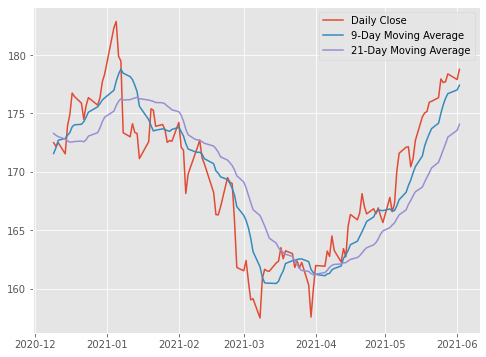

In [5]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
#     Look at the last 120 days
    plt.plot(gld.Close[-120:],label='Daily Close')
    plt.plot(gld['9-day'][-120:],label='9-Day Moving Average')
    plt.plot(gld['21-day'][-120:],label='21-Day Moving Average')
    plt.legend(loc=1)

In [6]:
# When the faster moving average is moving above the slower one, indicates time to buy
gld['position'] = np.where(gld['9-day'] > gld['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
gld['position'] = np.where(gld['9-day'] < gld['21-day'],-1,gld['position'])

In [7]:
gld.tail()

,High,Low,Open,Close,Volume,9-day,21-day,Change,position
Date,,,,,,,,,
2021-05-26,178.610001,177.039993,178.369995,177.639999,8495400,175.725555,171.878095,-0.001744,1
2021-05-27,177.820007,176.809998,177.389999,177.710007,7993000,176.283334,172.392381,0.000394,1
2021-05-28,178.429993,177.240005,177.460007,178.380005,9967000,176.692223,172.971429,0.003763,1
2021-06-01,178.850006,177.190002,178.759995,177.899994,9140700,177.010001,173.554286,-0.002695,1
2021-06-02,178.779999,177.970001,178.339996,178.770004,6560228,177.411112,174.076191,0.004879,1


In [8]:
# Whether we are making money with this system
gld['system_wrong'] = gld['position'] * gld['Change']

<AxesSubplot:xlabel='Date'>

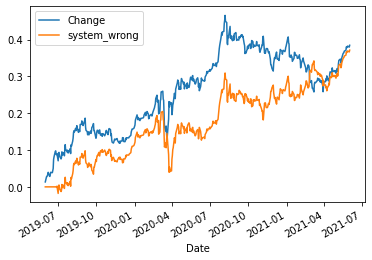

In [9]:
# Work out cumulative sum
gld[['Change','system_wrong']].cumsum().plot()

<AxesSubplot:xlabel='Date'>

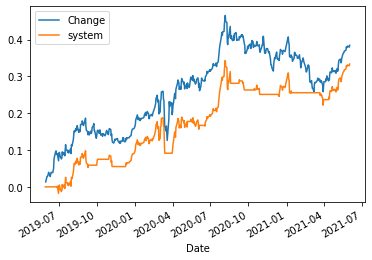

In [10]:
gld['system'] = np.where(gld['position'] > 0, gld['position']* gld['Change'],0)
gld[['Change','system']].cumsum().plot()